<a href="https://colab.research.google.com/github/chandan110791/Convolutional-Neural-Networks/blob/main/1_Cifar_10_with_dropout_without_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# import libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [30]:
# batch, classes, epochs
batch_size = 32 
num_classes = 10 
epochs = 50

In [31]:
# The data, split between train and test sets:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print('x_train_shape:',x_train.shape)
print(x_train.shape[0],'x_train samples')
print(x_test.shape[1],'x_test samples')


x_train_shape: (50000, 32, 32, 3)
50000 x_train samples
32 x_test samples


In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

AxesSubplot(0.125,0.536818;0.133621x0.343182)
[   29    30    35 ... 49941 49992 49994]
5000
AxesSubplot(0.285345,0.536818;0.133621x0.343182)
[    4     5    32 ... 49993 49998 49999]
5000
AxesSubplot(0.44569,0.536818;0.133621x0.343182)
[    6    13    18 ... 49987 49991 49995]
5000
AxesSubplot(0.606034,0.536818;0.133621x0.343182)
[    9    17    21 ... 49979 49982 49983]
5000
AxesSubplot(0.766379,0.536818;0.133621x0.343182)
[    3    10    20 ... 49981 49984 49990]
5000
AxesSubplot(0.125,0.125;0.133621x0.343182)
[   27    40    51 ... 49964 49980 49988]
5000
AxesSubplot(0.285345,0.125;0.133621x0.343182)
[    0    19    22 ... 49962 49966 49996]
5000
AxesSubplot(0.44569,0.125;0.133621x0.343182)
[    7    11    12 ... 49965 49978 49986]
5000
AxesSubplot(0.606034,0.125;0.133621x0.343182)
[    8    62    69 ... 49968 49976 49985]
5000
AxesSubplot(0.766379,0.125;0.133621x0.343182)
[    1     2    14 ... 49963 49971 49997]
5000


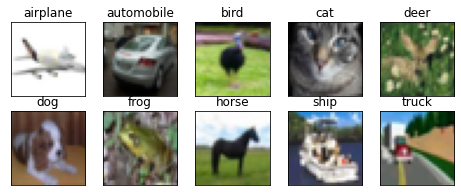

In [32]:
# plotting some random 10 images
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5,1 + i, xticks=[], yticks=[])
    print(ax)
    idx = np.where(y_train[:]==i)[0]
    print(idx)
    features_idx = x_train[idx,::]
    print(features_idx.shape[0])
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [33]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [34]:
#model architecture 
model = Sequential()

In [35]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [36]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [37]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [39]:
#compile the model 
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [40]:
#convert to float,normalize the data 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
#train

model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - ETA: 0s - loss: 2.1111 - accuracy: 0.2116